# Powder XRD: CsCl

In [1]:
from core.lattice import *
from matplotlib import pyplot as plt
%matplotlib inline

## Create structure

In [2]:
CsCl = Lattice([4.119],'P m -3 m')

In [3]:
CsCl.add_atom('Cs',[0.5,0.5,0.5])
CsCl.add_atom('Cl',[0.0,0.0,0.0])

## XRD

In [16]:
# set up diffraction experiment
CsCl.diffraction(6000)

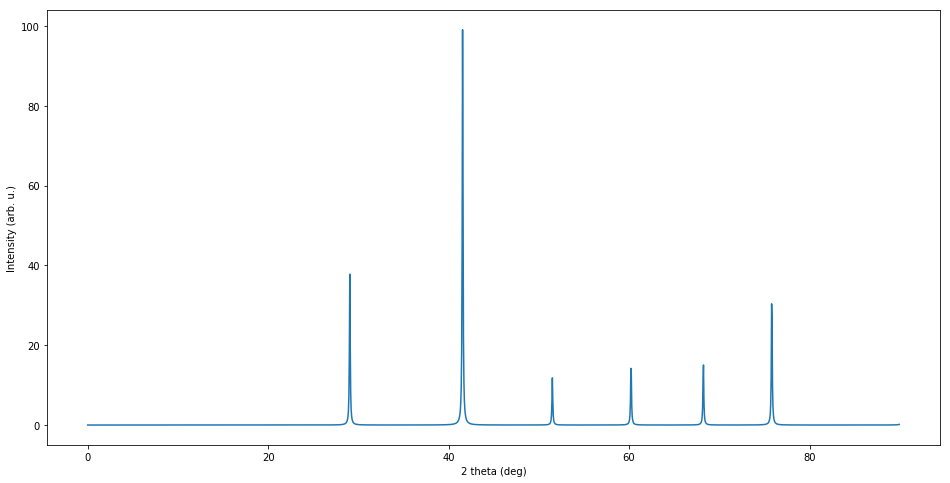

In [17]:
# plot powder pattern
CsCl.diffract.powder()

In [18]:
refs = CsCl.diffract.generate_reflections(n=20)
refs.head(10)

,tth,h,k,l,m,int
0,29.054209,0,0,1,6,38.071393
1,41.554832,1,0,1,12,100.000000
2,51.502399,1,1,1,8,11.840276
3,60.221883,0,0,2,6,16.920184
4,68.234844,1,0,2,24,16.421064
5,75.820309,1,1,2,24,35.380563
6,90.384745,2,0,2,12,12.282822
7,97.617226,0,0,3,6,2.049752
8,97.617226,2,1,2,24,8.199008
9,104.974775,1,0,3,24,21.794473


## Interactive version: plotly

In [20]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [21]:
# prepare label
hkl_label = np.array([refs.h,refs.k,refs.l]).T
n = len(refs.h)

text=['('+'{:d}'.format(refs.h[k])
         +'{:d}'.format(refs.k[k])
         +'{:d}'.format(refs.l[k])+')'
         +'<br> tth='+'{:.2f}'.format(refs.tth[k])
         +'<br> int='+'{:.2f}'.format(refs.int[k])
                   for k in range(n)]

In [22]:
trace1 = go.Scatter(
    x = refs.tth,
    y = 0*refs.int-10,
    mode = 'markers',
    marker = dict(
        size = 5,
        color = 'rgba(255, 182, 193, 1.0)'),
    hoverinfo='text',
    showlegend = False,
    text=text)

In [23]:
def lorz(x,a,c,w):
    L = a*w**2 / ( (x-c)**2 + w**2 )
    return L

x=np.arange(0,180,.05)
y=np.zeros_like(x)

for t,s in zip(refs.tth, refs.int):
    y += lorz(x,s,t,.1)

trace2 = go.Scatter(
    x = x,
    y = y+5,
    hoverinfo='none',
    showlegend = False,
    line = dict(
            width = 1,
            color = 'rgba(0, 0, 200, 1.0)')
)
    

In [24]:
iplot([trace1, trace2]) 